# Final Evaluation of ML Algorithms
___
Prepared by [Ali Rifat Kaya](https://www.linkedin.com/in/alirifatkaya/)
___

# Table of Contents

1. [Import Libraries & Read Data](#Import-Libraries-&-Read-Data)
2. [Train Estimators](#Train-Estimators)
3. [Test Estimators](#Test-Estimators)
4. [Confusion Matrices](#Confusion-Matrices)
5. [Conclusion](#Conclusion)


# Import Libraries & Read Data

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from my_module import *
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
# reads data into a dataframe
raw_data = pd.read_csv('creditcard_new.csv', header=0)
# copy data into another dataframe by keeping the original safe
df = raw_data.copy()
# input matrix and target array
X = df.drop(['Class', 'Hours'], axis=1).values  # define the input matrix
y = df.Class.values  # the label array (classes)
# split the data into the training data (70%) and the test data (30%)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)

In [3]:
print(('Training data has {} fraudulent transactions.'.format(y_train.sum())))
print(('Test data has {} fradulent transactions.'.format(y_test.sum())))
print(('\nDistribution of positive class in training data: {}'.format(
    round((y_train[y_train == 1].size/y_train.size), 4))))
print(('Distribution of positive class in test data: {}'.format(
    round((y_test[y_test == 1].size/y_test.size), 4))))

Training data has 337 fraudulent transactions.
Test data has 128 fradulent transactions.

Distribution of positive class in training data: 0.0017
Distribution of positive class in test data: 0.0015


# Train Estimators

In [4]:
# define estimators
lr = LogisticRegression(C=0.1, class_weight=None, solver='lbfgs')
knn = KNeighborsClassifier(n_neighbors=3)
dt = DecisionTreeClassifier(class_weight=None, max_features='log2')
rf = RandomForestClassifier(class_weight='balanced',
                            max_features='log2', n_estimators=1000)
et = ExtraTreesClassifier(class_weight='balanced',
                          max_features='log2', n_estimators=1000)
adaboost = AdaBoostClassifier(learning_rate=0.1, n_estimators=1000)
gb = GradientBoostingClassifier(
    learning_rate=0.001, max_features=None, n_estimators=1000)
xgb = XGBClassifier(colsample_bytree=0.2, eta=0.5)
# define estimators as a list of tuples
estimators = [('Logistic Regression', lr),
              ('KNN Classifier', knn),
              ('Decision Tree Classifier', dt),
              ('Random Forest Classifier', rf),
              ('Extra Trees Classifier', et),
              ('AdaBoost Classifier', adaboost),
              ('Gradient Boosting Classifier', gb),
              ('XGBoost Classifier', xgb)]
scalers = [True, True, False, False, False, False, False, False]
training_scores = train_model(
    estimators=estimators, X=X_train, y=y_train, scalers=scalers)
training_scores_, _ = calculate_statistics(training_scores)
df_training = make_df_statistics(training_scores_)
df_training

,matthews_corrcoef,roc_auc_score,pr_auc_score
Logistic Regression,0.729012,0.979083,0.770047
KNN Classifier,0.890411,0.999962,0.980405
Decision Tree Classifier,1.000000,1.000000,1.000000
Random Forest Classifier,1.000000,1.000000,1.000000
Extra Trees Classifier,1.000000,1.000000,1.000000
AdaBoost Classifier,0.852379,0.999675,0.914977
Gradient Boosting Classifier,0.817135,0.927180,0.868317
XGBoost Classifier,1.000000,1.000000,1.000000


# Test Estimators

In [5]:
test_scores = test_model(estimators=estimators,
                         X=X_test, y=y_test, scalers=scalers)
test_scores_, _ = calculate_statistics(test_scores)
df_test = make_df_statistics(test_scores_)
df_test

,matthews_corrcoef,roc_auc_score,pr_auc_score
Logistic Regression,0.705733,0.970142,0.729675
KNN Classifier,0.845124,0.902262,0.854349
Decision Tree Classifier,0.759866,0.870934,0.760632
Random Forest Classifier,0.839083,0.962461,0.810882
Extra Trees Classifier,0.866251,0.965172,0.822000
AdaBoost Classifier,0.817036,0.978020,0.803204
Gradient Boosting Classifier,0.751309,0.894359,0.800485
XGBoost Classifier,0.875223,0.969497,0.812641


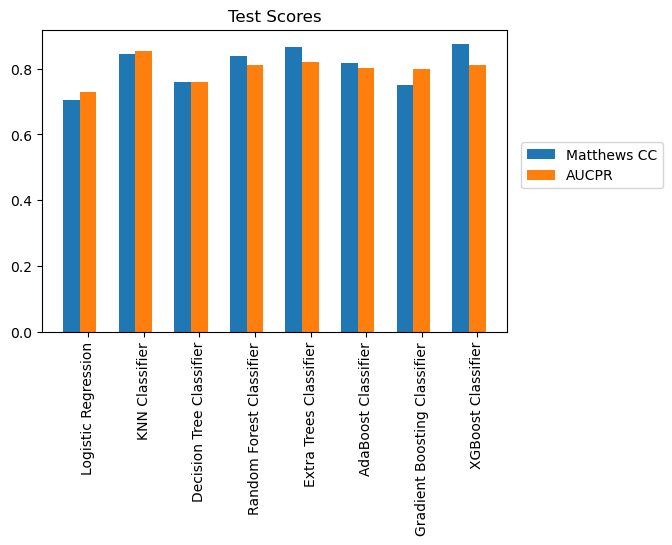

In [6]:
fig, ax = plt.subplots()  # generates figure and axes object
fig.set_dpi(100)  # set the resolution of the plot
width = 0.3  # set bar width
idx = np.arange(
    df_test.shape[0])  # number of ticks for x-axis and bar location
# plots matthews correlation coef.
ax.bar(idx, df_test.matthews_corrcoef, width)
ax.bar(idx + width, df_test.pr_auc_score, width)  # plots AUCPR
ax.set_xticks(idx + 0.3)  # adjust the position of xticks
ax.set_xticklabels(df_test.index, rotation=90)  # changes the tick labels
ax.legend(['Matthews CC', 'AUCPR', 'AUCROC'],
          bbox_to_anchor=(1.35, 0.65))  # set the legend
ax.set_title('Test Scores')
plt.show()  # shows the plot

# Confusion Matrices

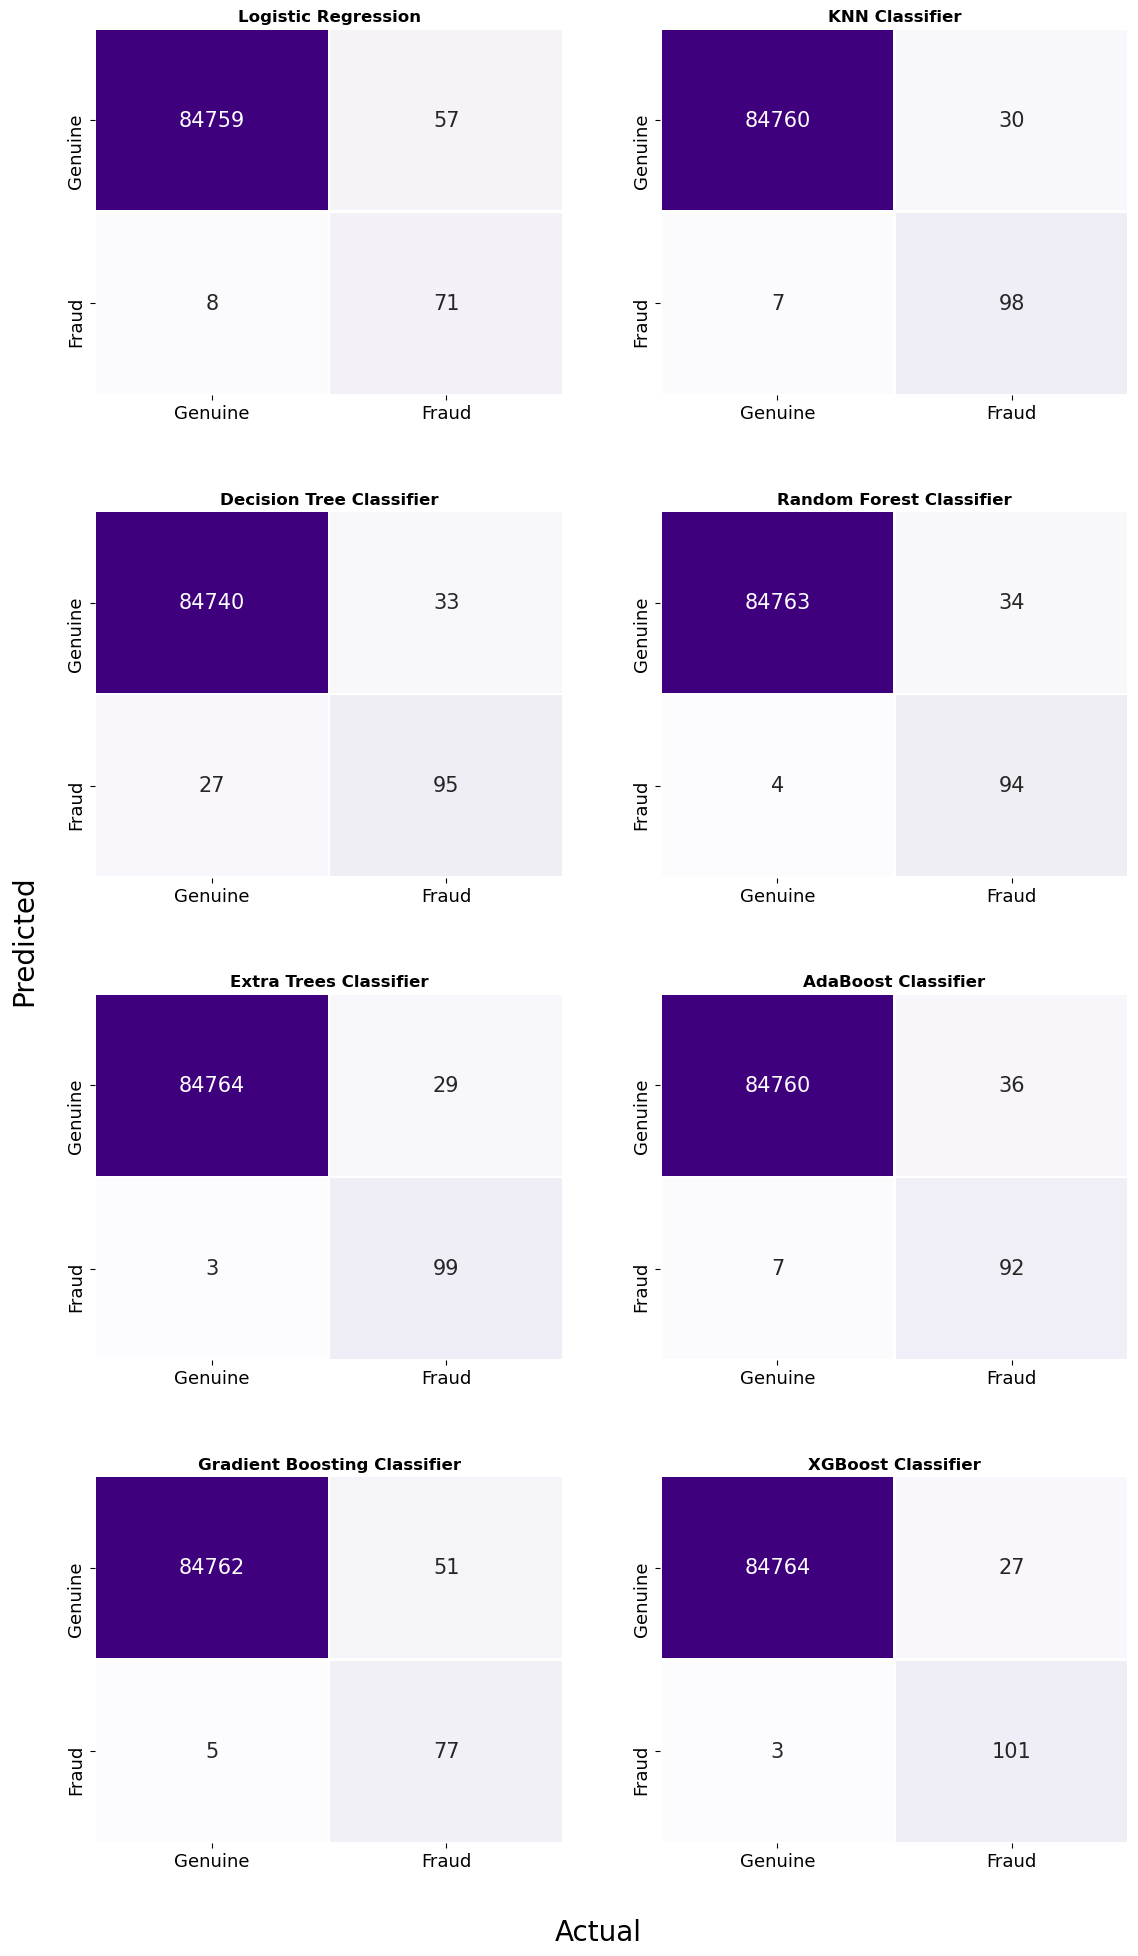

In [7]:
predicted_values_all = []
for model in df_test.index:
    predicted_values_all.append(test_scores[model]['predictions'][0])

fig, axes = plt.subplots(4, 2, figsize=(12, 20))
fig.set_dpi(100)
axes = axes.ravel()

for idx, model in enumerate(df_test.index):
    plot_confusion_matrix(
        y=y_test, predictions=predicted_values_all[idx], title=model, ax=axes[idx], cmap='Purples', cbar=False)
fig.text(0.5, 0, 'Actual', ha='center', size=20)
fig.text(0.01, 0.5, 'Predicted', va='center', size=20, rotation='vertical')
plt.tight_layout(5)
plt.show()

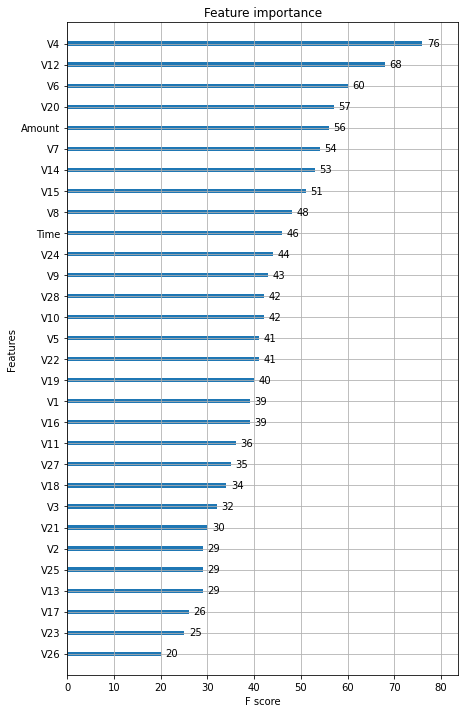

In [14]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(7, 12))
xgb.get_booster().feature_names = list(df.drop(['Class',
                                                'Hours'], axis=1).columns)
plot_importance(xgb, ax=ax)
plt.show()

# Conclusion

* In the [Hyperparameter Optimization](hyperparameter_optimization.ipynb), a narrow set of hyperparameters were tested and the best performing pair of parameters are selected to be tested for final evaluation.
* Even though, the __Gradient Boosting Classifier__ is dropped from the study in the [Default Models](algorithms_with_default_parameters.ipynb#Cross-Validation-Results), it is included in the _hyperparameter optimization_ and did a great job by increasing __AUCPR__ score from 60% to 82%. For this reason, it is included in the final evaluation.
* Eight algorithms are tested, and the evaluation metric scores and the confusion matrices are reported. There is not a single pattern in the results. While __Decision Tree Classifier__, __Random Forest Classifier__ and __Extra Trees Classifier__ increased __AUCPR__ score, they actually did not outperform their default model performances. For example, __Decision Tree Classifier__ correctly predicted 97 out of 128 fraudulent transactions with the _default_ parameters. However, after tuning the parameters, it was only able to correctly predicted 87 out of 128 fraudulent transactions. 
* On the other hand, __XGBoost Classifier__ slightly improved the __AUCPR__ score and the improvement is also observable in the confusion matrix scores.  Also, AdaBoost Classifier improved its performance substantially. However, the improvement is not good enough to be the top algorithm for fraud detection.
* __Logistic Regression__ and __K-Nearest Neighbor Classifier__ stayed stable and it can be observed from __AUCPR__ scores of default models and tuned models.
* *Hyperparameter optimization*, overall, did have a positive effect on the performance of algorithms. Based on the test scores and the confusion matrices the top 3 algorithms are:

    1. XGBoost Classifier (Tuned Parameters)
    2. Extra Trees Classifier (Default Parameters)
    3. K-Nearest Neighbors (Default Parameters)
  
  
* Finally, the best algorithm, ceteris paribus :), is the __XGBoost Classifier__.
* Also, __Matthews CC__ is as good as __AUCPR__. Actually, with the tuned algorithms, it is a better indicator of the performance than __AUCPR__.

* The top 5 features for XGBoost Classifier are `V4`, `V12`, `V6`, `V20`, and `Amount`. These are not the expected features when we compare what we inferred from [Exploratory Data Analysis](exploratory_data_analysis.ipynb). However, we see from the performance of XGBoost Classifier that these features are good at distinguishing between genuine and fraudulent transactions.

__NOTE!!!__ Due to the limited resources (time, computing power, data etc.) the project may not be the best or the ideal project. However, I believe that it fulfilled its objective as a first data science project, in which I played around the algorithms, parameters, resampling method(s) and did a lot of coding practice. For this reason, I do not have any claim to do the best project in terms of data science but I do have a claim to do the best I can do for an apprentice in the field of data science. Please do contact with me via [LinkedIn](https://www.linkedin.com/in/alirifatkaya/) for any comment and/or constructive criticism. 